In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 14 11:36:28 2023

@author: hugo511
"""
import argparse
import datetime
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
import os 

parser = argparse.ArgumentParser(description="Asset Pricing - Hill_estimate")
parser.add_argument('--dataset_start', type=int, default=196301, help='dataset start date')
parser.add_argument('--dataset_end', type=int, default=201012, help='dataset end date')
parser.add_argument('--qt', type=float, default=0.05, help='quantile value - u_t')
parser.add_argument('--save_dir', type=str, default='./Hill_estimate_results/', help='results save dirs')
parser.add_argument('--isTest', type=bool, default=True, help='is Test or not')
parser.add_argument('-f')
args = parser.parse_args()


if __name__ == '__main__':
    args.isTest = False 
    args.dataset_start = 196301
    args.dataset_end = 202212 
    end_year = str(args.dataset_end)[:4]   

In [14]:
# dataset
allstocks_ret = pd.read_csv('../dataset20230614/allstocks_ret_bycolumn_19260101_20221231.csv', low_memory=True)
monthly_ret = pd.read_csv('./Dataset/MarketRET_Monthly_192601_202212.csv', usecols=['date', 'vwretd'])
monthly_ret['YYYYMM'] = monthly_ret['date'].apply(lambda x: int(x))

allstocks_ret = allstocks_ret[((allstocks_ret['SHRCD'] == 10.) | (allstocks_ret['SHRCD'] == 11.)) \
                              & ((allstocks_ret['EXCHCD'] == 1) | (allstocks_ret['EXCHCD'] == 2) | (allstocks_ret['EXCHCD'] == 3)) ]
dt_lt = monthly_ret['YYYYMM'].unique().tolist()
dt_lt.sort()           
# realized market return 3 years 
realized_mkt_ret = pd.DataFrame(columns=['date', 'rtA3Y'])
for d in dt_lt:
    time1 = time.time()
    mkt_rt = monthly_ret[(monthly_ret['YYYYMM'] > int(d)) & (monthly_ret['YYYYMM'] <= int(d)+300)]
    rtA3Y = (mkt_rt['vwretd'] + 1.0).prod() - 1.
    realized_mkt_ret = realized_mkt_ret.append({'date':int(d), 'rtA3Y':rtA3Y}, ignore_index=True)
    time2 = time.time()
    print(f"============== finish {d}: {dt_lt.index(d) / len(dt_lt):.2f} {rtA3Y:.4f} : {(time2 - time1) / 60:.2f} min ============== ")


============== finish 192601: 0.00 1.1392 : 0.00 min ============== 
============== finish 192602: 0.00 1.2113 : 0.00 min ============== 
============== finish 192603: 0.00 1.3441 : 0.00 min ============== 
============== finish 192604: 0.00 1.2992 : 0.00 min ============== 
============== finish 192605: 0.00 1.1356 : 0.00 min ============== 
============== finish 192606: 0.00 1.2327 : 0.00 min ============== 
============== finish 192607: 0.01 1.2642 : 0.00 min ============== 
============== finish 192608: 0.01 1.3890 : 0.00 min ============== 
============== finish 192609: 0.01 1.2554 : 0.00 min ============== 
============== finish 192610: 0.01 0.8659 : 0.00 min ============== 
============== finish 192611: 0.01 0.5895 : 0.00 min ============== 
============== finish 192612: 0.01 0.5697 : 0.00 min ============== 
============== finish 192701: 0.01 0.6574 : 0.00 min ============== 
============== finish 192702: 0.01 0.6302 : 0.00 min ============== 
============== finish 192703: 0.01

============== finish 194501: 0.20 0.2676 : 0.00 min ============== 
============== finish 194502: 0.20 0.1391 : 0.00 min ============== 
============== finish 194503: 0.20 0.2835 : 0.00 min ============== 
============== finish 194504: 0.20 0.2358 : 0.00 min ============== 
============== finish 194505: 0.20 0.3039 : 0.00 min ============== 
============== finish 194506: 0.20 0.2975 : 0.00 min ============== 
============== finish 194507: 0.20 0.2600 : 0.00 min ============== 
============== finish 194508: 0.20 0.1911 : 0.00 min ============== 
============== finish 194509: 0.20 0.1024 : 0.00 min ============== 
============== finish 194510: 0.20 0.1252 : 0.00 min ============== 
============== finish 194511: 0.20 -0.0315 : 0.00 min ============== 
============== finish 194512: 0.21 -0.0128 : 0.00 min ============== 
============== finish 194601: 0.21 -0.0688 : 0.00 min ============== 
============== finish 194602: 0.21 -0.0397 : 0.00 min ============== 
============== finish 194603: 

============== finish 196303: 0.38 0.4868 : 0.00 min ============== 
============== finish 196304: 0.38 0.4547 : 0.00 min ============== 
============== finish 196305: 0.38 0.3512 : 0.00 min ============== 
============== finish 196306: 0.39 0.3618 : 0.00 min ============== 
============== finish 196307: 0.39 0.3466 : 0.00 min ============== 
============== finish 196308: 0.39 0.1828 : 0.00 min ============== 
============== finish 196309: 0.39 0.1887 : 0.00 min ============== 
============== finish 196310: 0.39 0.2055 : 0.00 min ============== 
============== finish 196311: 0.39 0.2335 : 0.00 min ============== 
============== finish 196312: 0.39 0.2148 : 0.00 min ============== 
============== finish 196401: 0.39 0.2855 : 0.00 min ============== 
============== finish 196402: 0.39 0.2776 : 0.00 min ============== 
============== finish 196403: 0.39 0.3099 : 0.00 min ============== 
============== finish 196404: 0.39 0.3582 : 0.00 min ============== 
============== finish 196405: 0.40

============== finish 198109: 0.57 0.6214 : 0.00 min ============== 
============== finish 198110: 0.57 0.5293 : 0.00 min ============== 
============== finish 198111: 0.58 0.4466 : 0.00 min ============== 
============== finish 198112: 0.58 0.5237 : 0.00 min ============== 
============== finish 198201: 0.58 0.6988 : 0.00 min ============== 
============== finish 198202: 0.58 0.8206 : 0.00 min ============== 
============== finish 198203: 0.58 0.8360 : 0.00 min ============== 
============== finish 198204: 0.58 0.7560 : 0.00 min ============== 
============== finish 198205: 0.58 0.9077 : 0.00 min ============== 
============== finish 198206: 0.58 0.9879 : 0.00 min ============== 
============== finish 198207: 0.58 1.0290 : 0.00 min ============== 
============== finish 198208: 0.58 0.8045 : 0.00 min ============== 
============== finish 198209: 0.58 0.7041 : 0.00 min ============== 
============== finish 198210: 0.59 0.5911 : 0.00 min ============== 
============== finish 198211: 0.59

============== finish 200708: 0.84 -0.2066 : 0.00 min ============== 
============== finish 200709: 0.84 -0.1679 : 0.00 min ============== 
============== finish 200710: 0.84 -0.1576 : 0.00 min ============== 
============== finish 200711: 0.84 -0.1093 : 0.00 min ============== 
============== finish 200712: 0.84 -0.0452 : 0.00 min ============== 
============== finish 200801: 0.85 0.0376 : 0.00 min ============== 
============== finish 200802: 0.85 0.1011 : 0.00 min ============== 
============== finish 200803: 0.85 0.1165 : 0.00 min ============== 
============== finish 200804: 0.85 0.0925 : 0.00 min ============== 
============== finish 200805: 0.85 0.0510 : 0.00 min ============== 
============== finish 200806: 0.85 0.1194 : 0.00 min ============== 
============== finish 200807: 0.85 0.1090 : 0.00 min ============== 
============== finish 200808: 0.85 0.0342 : 0.00 min ============== 
============== finish 200809: 0.85 0.0493 : 0.00 min ============== 
============== finish 200810:

============== finish 202102: 0.98 -0.0362 : 0.00 min ============== 
============== finish 202103: 0.98 -0.0648 : 0.00 min ============== 
============== finish 202104: 0.98 -0.1078 : 0.00 min ============== 
============== finish 202105: 0.98 -0.1141 : 0.00 min ============== 
============== finish 202106: 0.98 -0.1344 : 0.00 min ============== 
============== finish 202107: 0.98 -0.1445 : 0.00 min ============== 
============== finish 202108: 0.99 -0.1671 : 0.00 min ============== 
============== finish 202109: 0.99 -0.1304 : 0.00 min ============== 
============== finish 202110: 0.99 -0.1832 : 0.00 min ============== 
============== finish 202111: 0.99 -0.1679 : 0.00 min ============== 
============== finish 202112: 0.99 -0.1947 : 0.00 min ============== 
============== finish 202201: 0.99 -0.1435 : 0.00 min ============== 
============== finish 202202: 0.99 -0.1244 : 0.00 min ============== 
============== finish 202203: 0.99 -0.1503 : 0.00 min ============== 
============== finis

In [16]:
allstocks_ret_select = allstocks_ret[(allstocks_ret['date'] >= '1963-01-01') & (allstocks_ret['date'] <= f'{end_year}-12-31')]
allstocks_ret_select[(allstocks_ret_select['RET'] == 'B') | (allstocks_ret_select['RET'] == 'C')] = np.nan  
allstocks_ret_select = allstocks_ret_select[~allstocks_ret_select['RET'].isna()]   
allstocks_ret_select['YYYYMM'] = allstocks_ret_select['date'].apply(lambda x: int(x[:4] + x[5:7]))
dt_lt = allstocks_ret_select['YYYYMM'].unique().tolist()
dt_lt.sort()
Hill_estimate = pd.DataFrame(columns=['date', 'lambda_t', 'u_t', 'mkt_vol'])
for d in dt_lt:
    time1 = time.time()
    month_df = allstocks_ret_select[allstocks_ret_select['YYYYMM'] == d][['PERMNO', 'date', 'RET', 'vwretd', 'YYYYMM']]
    month_df = month_df.drop_duplicates()
    dt_ret = month_df['RET'].dropna()
    ret = np.array(dt_ret, dtype=np.float64)
    # u_t, lambda_t
    u_t = np.quantile(ret, q=args.qt)    
    ret_exceed = ret[np.where(ret / u_t > 1)]
    lambda_t = 1 / len(ret_exceed) * np.sum(np.log(ret_exceed / u_t))
    # Tail threshold and aggregate market volatity
    month_ucnt = month_df.groupby(by=['date']).agg({'YYYYMM':'nunique', 'vwretd':'nunique'})
    if month_ucnt[month_ucnt['YYYYMM'] > 1].shape[0] == 0:
        month_rt = month_df.groupby(by=['date']).agg({'YYYYMM':min, 'vwretd':min})
        mkt_vol = np.sqrt((month_rt['vwretd']**2).mean())
        Hill_estimate = Hill_estimate.append({'date':d, 'lambda_t':lambda_t, 'u_t':u_t, 'mkt_vol':mkt_vol}, ignore_index=True)
    else:
        StopIteration
    time2 = time.time()
    print(f"============== finish {d}: {dt_lt.index(d) / len(dt_lt):.2f} {lambda_t:.4f} : {(time2 - time1) / 60:.2f} min ============== ")
Hill_estimate['rtA3Y'] = realized_mkt_ret[realized_mkt_ret['date'] >= args.dataset_start].reset_index(drop=True)['rtA3Y']


if args.isTest:
    args.save_dir = './logs/testHill_estimate_results/'
else:
    args.save_dir = './logs/Hill_estimate_results/'
if not os.path.exists(args.save_dir):
    os.makedirs(args.save_dir)
Hill_estimate.to_csv(os.path.join(args.save_dir, f'Hillestimate_plotresults_{args.dataset_start}_{args.dataset_end}.csv'), index=False)

============== finish 196301: 0.00 0.4721 : 0.00 min ============== 
============== finish 196302: 0.00 0.4622 : 0.00 min ============== 
============== finish 196303: 0.00 0.4845 : 0.00 min ============== 
============== finish 196304: 0.00 0.4876 : 0.00 min ============== 
============== finish 196305: 0.01 0.4766 : 0.00 min ============== 
============== finish 196306: 0.01 0.4552 : 0.00 min ============== 
============== finish 196307: 0.01 0.4489 : 0.00 min ============== 
============== finish 196308: 0.01 0.4874 : 0.00 min ============== 
============== finish 196309: 0.01 0.4447 : 0.00 min ============== 
============== finish 196310: 0.01 0.4484 : 0.00 min ============== 
============== finish 196311: 0.01 0.4819 : 0.00 min ============== 
============== finish 196312: 0.02 0.4667 : 0.00 min ============== 
============== finish 196401: 0.02 0.4507 : 0.00 min ============== 
============== finish 196402: 0.02 0.4818 : 0.00 min ============== 
============== finish 196403: 0.02

============== finish 197212: 0.17 0.3821 : 0.00 min ============== 
============== finish 197301: 0.17 0.3743 : 0.00 min ============== 
============== finish 197302: 0.17 0.3646 : 0.00 min ============== 
============== finish 197303: 0.17 0.4046 : 0.00 min ============== 
============== finish 197304: 0.17 0.3841 : 0.00 min ============== 
============== finish 197305: 0.17 0.3877 : 0.00 min ============== 
============== finish 197306: 0.17 0.4057 : 0.00 min ============== 
============== finish 197307: 0.17 0.4358 : 0.00 min ============== 
============== finish 197308: 0.18 0.4075 : 0.00 min ============== 
============== finish 197309: 0.18 0.4454 : 0.00 min ============== 
============== finish 197310: 0.18 0.3734 : 0.01 min ============== 
============== finish 197311: 0.18 0.3504 : 0.00 min ============== 
============== finish 197312: 0.18 0.3655 : 0.00 min ============== 
============== finish 197401: 0.18 0.3956 : 0.00 min ============== 
============== finish 197402: 0.18

============== finish 198211: 0.33 0.4473 : 0.00 min ============== 
============== finish 198212: 0.33 0.4487 : 0.01 min ============== 
============== finish 198301: 0.33 0.4520 : 0.00 min ============== 
============== finish 198302: 0.33 0.4878 : 0.00 min ============== 
============== finish 198303: 0.34 0.4760 : 0.00 min ============== 
============== finish 198304: 0.34 0.4637 : 0.00 min ============== 
============== finish 198305: 0.34 0.4600 : 0.00 min ============== 
============== finish 198306: 0.34 0.4444 : 0.00 min ============== 
============== finish 198307: 0.34 0.4063 : 0.00 min ============== 
============== finish 198308: 0.34 0.4339 : 0.00 min ============== 
============== finish 198309: 0.34 0.4756 : 0.00 min ============== 
============== finish 198310: 0.35 0.4328 : 0.00 min ============== 
============== finish 198311: 0.35 0.5030 : 0.00 min ============== 
============== finish 198312: 0.35 0.4784 : 0.00 min ============== 
============== finish 198401: 0.35

============== finish 199210: 0.50 0.4891 : 0.00 min ============== 
============== finish 199211: 0.50 0.5079 : 0.00 min ============== 
============== finish 199212: 0.50 0.5047 : 0.00 min ============== 
============== finish 199301: 0.50 0.4549 : 0.00 min ============== 
============== finish 199302: 0.50 0.4125 : 0.00 min ============== 
============== finish 199303: 0.50 0.4614 : 0.00 min ============== 
============== finish 199304: 0.50 0.4320 : 0.00 min ============== 
============== finish 199305: 0.51 0.4595 : 0.01 min ============== 
============== finish 199306: 0.51 0.4597 : 0.00 min ============== 
============== finish 199307: 0.51 0.4461 : 0.01 min ============== 
============== finish 199308: 0.51 0.4808 : 0.01 min ============== 
============== finish 199309: 0.51 0.4750 : 0.01 min ============== 
============== finish 199310: 0.51 0.4585 : 0.00 min ============== 
============== finish 199311: 0.51 0.4417 : 0.01 min ============== 
============== finish 199312: 0.52

============== finish 200209: 0.66 0.4198 : 0.00 min ============== 
============== finish 200210: 0.66 0.4472 : 0.00 min ============== 
============== finish 200211: 0.66 0.4513 : 0.00 min ============== 
============== finish 200212: 0.67 0.4239 : 0.00 min ============== 
============== finish 200301: 0.67 0.4283 : 0.00 min ============== 
============== finish 200302: 0.67 0.4594 : 0.00 min ============== 
============== finish 200303: 0.67 0.4592 : 0.00 min ============== 
============== finish 200304: 0.67 0.5124 : 0.00 min ============== 
============== finish 200305: 0.67 0.4585 : 0.00 min ============== 
============== finish 200306: 0.67 0.4096 : 0.00 min ============== 
============== finish 200307: 0.68 0.4466 : 0.00 min ============== 
============== finish 200308: 0.68 0.4418 : 0.00 min ============== 
============== finish 200309: 0.68 0.3798 : 0.00 min ============== 
============== finish 200310: 0.68 0.4258 : 0.00 min ============== 
============== finish 200311: 0.68

============== finish 201209: 0.83 0.4654 : 0.00 min ============== 
============== finish 201210: 0.83 0.4309 : 0.00 min ============== 
============== finish 201211: 0.83 0.4308 : 0.00 min ============== 
============== finish 201212: 0.83 0.4698 : 0.00 min ============== 
============== finish 201301: 0.83 0.4395 : 0.00 min ============== 
============== finish 201302: 0.83 0.4239 : 0.00 min ============== 
============== finish 201303: 0.84 0.4657 : 0.00 min ============== 
============== finish 201304: 0.84 0.3968 : 0.00 min ============== 
============== finish 201305: 0.84 0.4477 : 0.00 min ============== 
============== finish 201306: 0.84 0.4038 : 0.00 min ============== 
============== finish 201307: 0.84 0.4579 : 0.00 min ============== 
============== finish 201308: 0.84 0.4137 : 0.00 min ============== 
============== finish 201309: 0.84 0.4682 : 0.00 min ============== 
============== finish 201310: 0.85 0.4505 : 0.00 min ============== 
============== finish 201311: 0.85

============== finish 202208: 0.99 0.4117 : 0.00 min ============== 
============== finish 202209: 0.99 0.3522 : 0.00 min ============== 
============== finish 202210: 1.00 0.4043 : 0.00 min ============== 
============== finish 202211: 1.00 0.4122 : 0.00 min ============== 
============== finish 202212: 1.00 0.4052 : 0.00 min ============== 


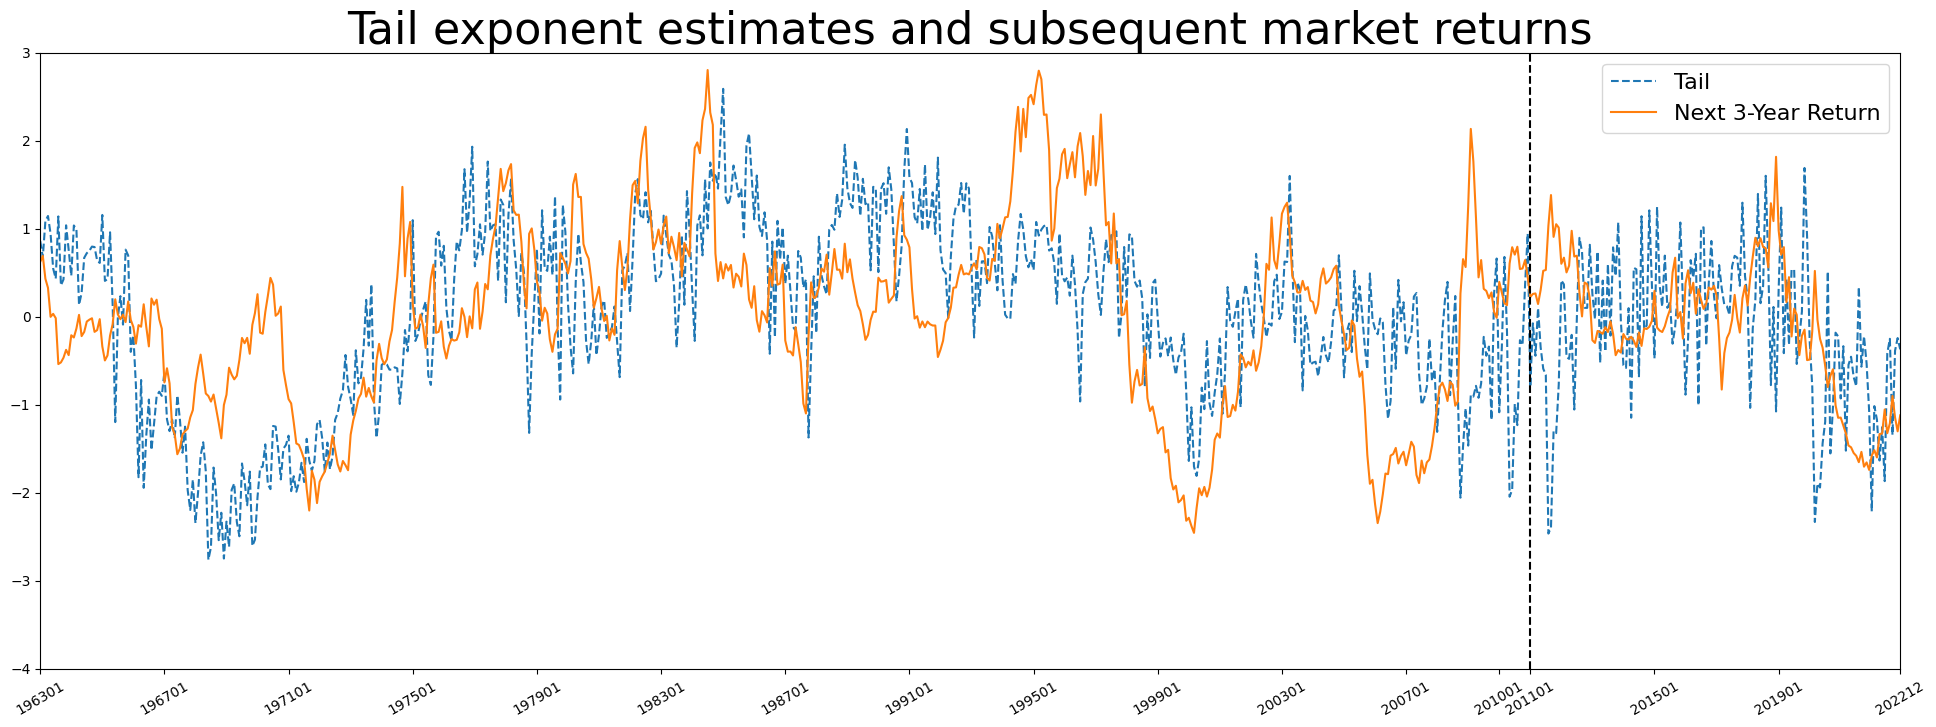

In [17]:
# ======================================================== #
#       Plot tail estimate and subsequent mkt returns      #
# ======================================================== #
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

dataplot = Hill_estimate[['date', 'lambda_t', 'rtA3Y']]
dataplot = dataplot[dataplot['date'] <= args.dataset_end]
dataplot.columns = ['date', 'lambda_t', 'rtA3Y']
dataplot['lambda_t'] = (dataplot['lambda_t'] - dataplot['lambda_t'].mean()) / dataplot['lambda_t'].std()
dataplot['rtA3Y'] = (dataplot['rtA3Y'] - dataplot['rtA3Y'].mean()) / dataplot['rtA3Y'].std()


fontsize1 = 32; fontsize2 = 16
xs = dataplot['date'].apply(lambda x: str(int(x))).tolist()
x_ticks = dataplot['date']
xs = [str(int(d)) for d in x_ticks]  
xticks_display = []
for i in xs:
    if (int(i[:4]) - 1963) % 4 == 0 and i[-2:] == '01':
        xticks_display.append(i)
xticks_display.append('201001')
xticks_display.append('202212')

# ---------------------
pdf = PdfPages(os.path.join(args.save_dir, f'Hillestimate_{args.dataset_start}_{args.dataset_end}.pdf'))
plt.figure(figsize=(24, 8))
plt.plot(xs, dataplot['lambda_t'], label='Tail', linestyle='--')
plt.plot(xs, dataplot['rtA3Y'],label='Next 3-Year Return')
plt.title('Tail exponent estimates and subsequent market returns', fontsize=fontsize1)
plt.xticks(xticks_display, rotation=30)
plt.vlines(x='201101', ymin=-4, ymax=3, linestyles='--', colors='black')
plt.xlim(xs[0], xs[-1])
plt.ylim(-4, 3.)
plt.legend(fontsize=fontsize2)
pdf.savefig()
pdf.close()
plt.show()
plt.close()

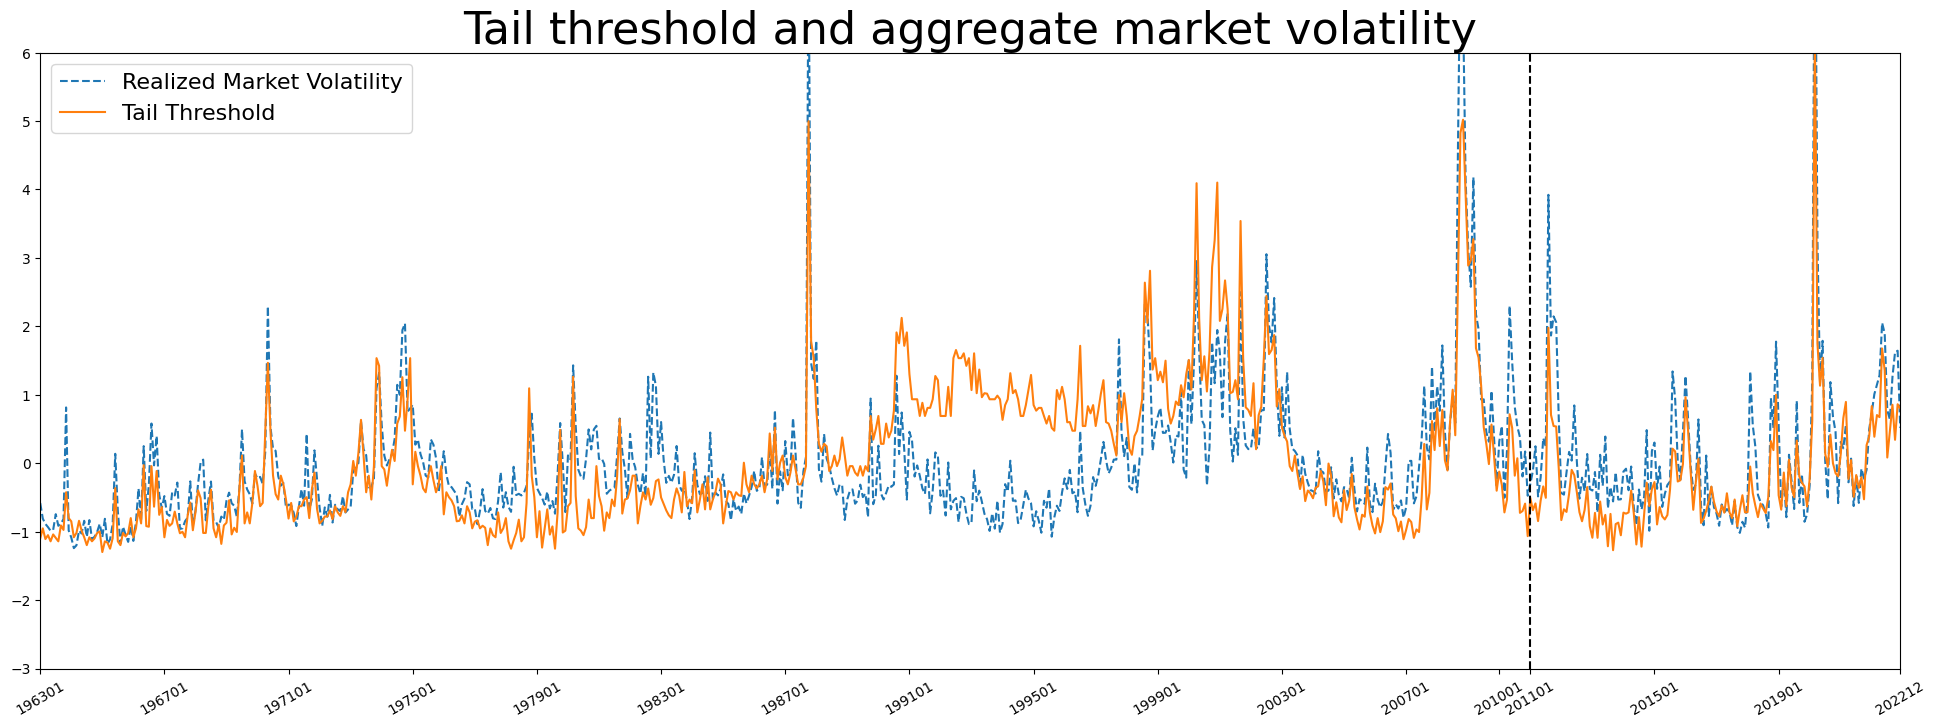

In [19]:
# ======================================================== #
#       Plot tail threshold and aggregate mkt volatility   #
# ======================================================== #
dataplot = Hill_estimate[['date', 'u_t', 'mkt_vol']] # 1:root mean square 2:root sum square
dataplot.columns = ['date', 'u_t', 'mkt_vol']
dataplot = dataplot[dataplot['date'] <= args.dataset_end]
dataplot['u_t'] = (dataplot['u_t'].abs() - dataplot['u_t'].abs().mean()) / dataplot['u_t'].abs().std()
dataplot['mkt_vol'] = (dataplot['mkt_vol'] - dataplot['mkt_vol'].mean()) / dataplot['mkt_vol'].std()
# dataplot['mkt_vol'] = (dataplot['mkt_vol']) / dataplot['mkt_vol'].std()

fontsize1 = 32; fontsize2 = 16
x_ticks = dataplot['date']
xs = [str(int(d)) for d in x_ticks]  
xticks_display = []
for i in xs:
    if (int(i[:4]) - 1963) % 4 == 0 and i[-2:] == '01':
        xticks_display.append(i)
xticks_display.append('201001')
xticks_display.append('202212')

# ---------------------
pdf = PdfPages(os.path.join(args.save_dir, f'Threshold_RV_{args.dataset_start}_{args.dataset_end}.pdf'))
plt.figure(figsize=(24, 8))
plt.plot(xs, dataplot['mkt_vol'], label='Realized Market Volatility', linestyle='--')
plt.plot(xs, dataplot['u_t'], label='Tail Threshold')
plt.title('Tail threshold and aggregate market volatility', fontsize=fontsize1)
plt.xticks(xticks_display, rotation=30)
plt.vlines(x='201101', ymin=-3, ymax=6, linestyles='--', colors='black')
plt.xlim(xs[0], xs[-1])
plt.ylim(-3, 6.)
plt.legend(fontsize=fontsize2)
pdf.savefig()
pdf.close()
plt.show()
plt.close()
